<a href="https://colab.research.google.com/github/Jellyjellyjinjin/Daycon-car-object-detection-/blob/main/yolov5_freeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x = glob.glob('/content/drive/MyDrive/input/images/*')

In [ ]:
print(x)

['/content/drive/MyDrive/input/images/syn_05509.png', '/content/drive/MyDrive/input/images/syn_05534.png', '/content/drive/MyDrive/input/images/syn_05549.png', '/content/drive/MyDrive/input/images/syn_05518.png', '/content/drive/MyDrive/input/images/syn_05516.png', '/content/drive/MyDrive/input/images/syn_05490.png', '/content/drive/MyDrive/input/images/syn_05485.png', '/content/drive/MyDrive/input/images/syn_05558.png', '/content/drive/MyDrive/input/images/syn_05560.png', '/content/drive/MyDrive/input/images/syn_05524.png', '/content/drive/MyDrive/input/images/syn_05565.png', '/content/drive/MyDrive/input/images/syn_05562.png', '/content/drive/MyDrive/input/images/syn_05526.png', '/content/drive/MyDrive/input/images/syn_05542.png', '/content/drive/MyDrive/input/images/syn_05519.png', '/content/drive/MyDrive/input/images/syn_05499.png', '/content/drive/MyDrive/input/images/syn_05503.png', '/content/drive/MyDrive/input/images/syn_05494.png', '/content/drive/MyDrive/input/images/syn_0551

In [ ]:
from re import X
import random
# 리스트를 랜덤하게 섞기

random.shuffle(x)

# 리스트 개수
total_images = len(x)

# 리스트 분할 비율 설정
train_ratio = 0.8  # 훈련 데이터 비율
train_count = int(total_images * train_ratio)

# 리스트를 분할하여 저장할 두 개의 리스트 생성
train = x[:train_count]
valid = x[train_count:]

print("훈련 데이터 리스트:", train)
print("테스트 데이터 리스트:", valid)

훈련 데이터 리스트: ['/content/drive/MyDrive/input/images/syn_01847.png', '/content/drive/MyDrive/input/images/syn_01982.png', '/content/drive/MyDrive/input/images/syn_02671.png', '/content/drive/MyDrive/input/images/syn_00875.png', '/content/drive/MyDrive/input/images/syn_01216.png', '/content/drive/MyDrive/input/images/syn_06334.png', '/content/drive/MyDrive/input/images/syn_05897.png', '/content/drive/MyDrive/input/images/syn_01146.png', '/content/drive/MyDrive/input/images/syn_02753.png', '/content/drive/MyDrive/input/images/syn_01933.png', '/content/drive/MyDrive/input/images/syn_01326.png', '/content/drive/MyDrive/input/images/syn_00510.png', '/content/drive/MyDrive/input/images/syn_03026.png', '/content/drive/MyDrive/input/images/syn_04861.png', '/content/drive/MyDrive/input/images/syn_05983.png', '/content/drive/MyDrive/input/images/syn_00829.png', '/content/drive/MyDrive/input/images/syn_01557.png', '/content/drive/MyDrive/input/images/syn_01625.png', '/content/drive/MyDrive/input/ima

In [ ]:
root_dir  = "/content/drive/MyDrive/new_Dacon"

# train.txt
with open(os.path.join(root_dir, "train.txt"), 'w') as f:
	f.write('\n'.join(train) + '\n')

# valid.txt
with open(os.path.join(root_dir, "valid.txt"), 'w') as f:
	f.write('\n'.join(valid) + '\n')



In [ ]:
#이미지와 라벨을 train 과 valid 파일로 나눠 복사해주는 split-folders 패키지 설치

#pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#input에있는 image, yololabel을 input_copy로 tain, val, test 로 나눠서 옮기기( 이후 input_copy를 Daycon 으로 이름 변경 )
"""
import splitfolders
input_folder = '/content/drive/MyDrive/input'
output_folder = '/content/drive/MyDrive/Data'
splitfolders.ratio(input_folder, output=output_folder, seed=970, ratio=(.8, .2), group_prefix = 1)
"""

Copying files: 65 files [00:36,  2.40 files/s]

In [ ]:
# 클래스 이름 리스트 생성
with open('/content/drive/MyDrive/classes.txt', 'r') as f:
    lines = f.readlines()
    # Extract class names and store them in a list
    classes = [line.strip().split(',')[1] for line in lines]

In [ ]:
root_dir  = "/content/drive/MyDrive/input"

In [ ]:
import yaml

yaml_data = {'nc': len(classes),
             'names': classes,
             "path": root_dir,
             "train":os.path.join(root_dir, "train.txt"), # train 경로
             "val":os.path.join(root_dir, "valid.txt"), # valid 경로
             }

with open(os.path.join(root_dir, "custom.yaml"), "w") as f:
  yaml.dump(yaml_data, f)

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -qr requirements.txt

In [ ]:
TRAIN = True
# Number of epochs to train for.
EPOCHS = 25

In [ ]:
%%time
%cd /content/yolov5

if TRAIN:
    !python train.py --data '/content/drive/MyDrive/input/custom.yaml' --weights yolov5m.pt \
    --img 640 --epochs {EPOCHS} --batch-size 16 --name 'car_yolov5s_result' \
    --freeze 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14

/content/yolov5
train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/input/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=car_yolov5s_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, 

In [ ]:
!ls /content/yolov5/runs/train/car_yolov5s_resultsplzz

confusion_matrix.png				    results.png
events.out.tfevents.1684888176.eaad3f44876e.8092.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


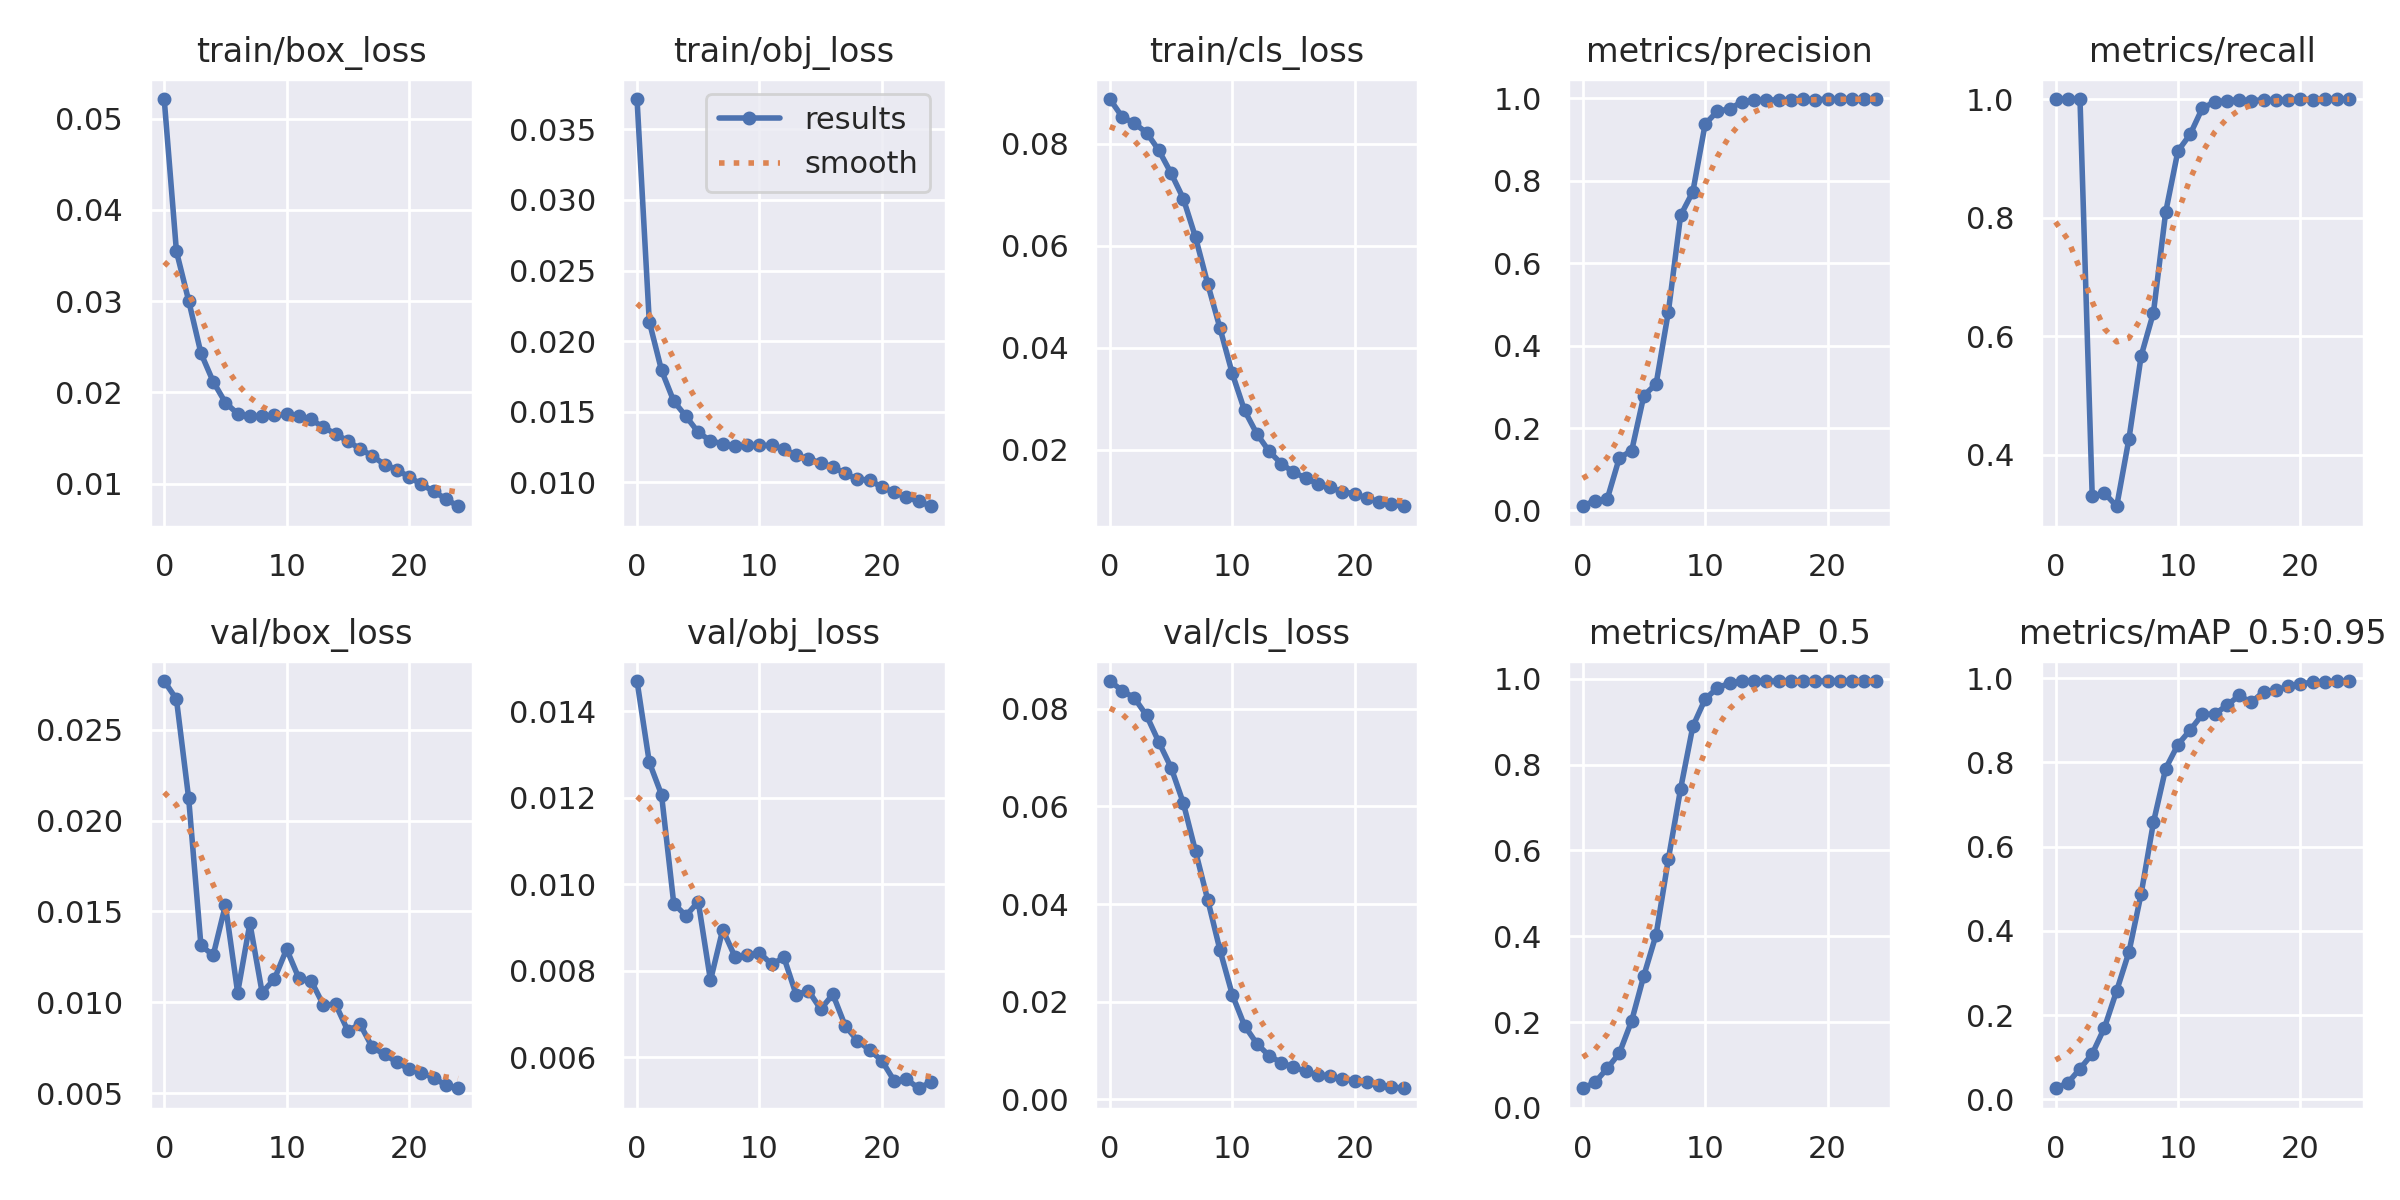

In [ ]:
from IPython.display import Image
Image(filename = '/content/yolov5/runs/train/car_yolov5s_result/results.png',width = 1000)

In [ ]:
!python val.py --weights /content/yolov5/runs/train/car_yolov5s_result/weights/best.pt --conf 0.5 --data '/content/drive/MyDrive/input/custom.yaml'  --iou 0.6 --half

val: data=/content/drive/MyDrive/input/custom.yaml, weights=['/content/yolov5/runs/train/car_yolov5s_result/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20986287 parameters, 0 gradients, 48.3 GFLOPs
val: Scanning /content/drive/MyDrive/input/valid.cache... 1297 images, 0 backgrounds, 0 corrupt: 100% 1297/1297 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 41/41 [01:00<00:00,  1.47s/it]
                   all       1297       3377      0.999          1      0.995      0.993
chevrolet_malibu_sedan_2012_2016       1297        100      0.999

In [ ]:
%cp /content/yolov5/runs/train/car_yolov5s_result/weights/last.pt /content/drive/MyDrive/weight_0

In [ ]:
!python detect.py --weights /content/drive/MyDrive/weight_0/last.pt --img 640  --source /content/drive/MyDrive/pretest/images --save-conf --save-txt

detect: weights=['/content/drive/MyDrive/weight_0/last.pt'], source=/content/drive/MyDrive/pretest/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20986287 parameters, 0 gradients, 48.3 GFLOPs
image 1/3400 /content/drive/MyDrive/pretest/images/064442001.png: 384x640 1 genesis_gv80_suv_2020_, 45.4ms
image 2/3400 /content/drive/MyDrive/pretest/images/064507368.png: 384x640 1 genesis_gv80_suv_2020_, 20.1ms
image 3/3400 /content/drive/MyDrive/pretest/images/065131036.png: 384x640 1 hyundai_grandstarex_van_2018_2

In [ ]:
import glob
import cv2
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/sample_submission.csv', header=0)
submit.columns

Index(['file_name', 'class_id', 'confidence', 'point1_x', 'point1_y',
       'point2_x', 'point2_y', 'point3_x', 'point3_y', 'point4_x', 'point4_y'],
      dtype='object')

In [ ]:
infer_txt_list = glob.glob('/content/yolov5/yolov5/runs/detect/exp2/labels/*.txt')

In [ ]:
def yolo_to_labelme(line, image_width, image_height, txt_file_name):
    file_name = txt_file_name.split("/")[-1].replace(".txt", ".png")
    class_id, x, y, width, height, confidence = [float(temp) for temp in line.split()]

    x_min = int((x - width / 2) * image_width)
    x_max = int((x + width / 2) * image_width)
    y_min = int((y - height / 2) * image_height)
    y_max = int((y + height / 2) * image_height)

    return file_name, int(class_id), confidence, x_min, y_max, x_max, y_max, x_max, y_min, x_min, y_min

In [ ]:

submit = pd.DataFrame(columns=['file_name', 'class_id', 'confidence', 'point1_x', 'point1_y', 'point2_x', 'point2_y', 'point3_x', 'point3_y', 'point4_x', 'point4_y'])

for txt in tqdm(infer_txt_list):
    with open(txt, 'r') as f:
        lines = f.readlines()
        base_file_name = txt.split('/')[-1].split('.')[0]
        img_height, img_width = cv2.imread('/content/yolov5/yolov5/runs/detect/exp2/' + base_file_name + '.png').shape[:2]
        for line in lines:
            file_name, class_id, confidence, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y, point4_x, point4_y = yolo_to_labelme(line, img_width, img_height, txt)
            submit = submit.append({'file_name':file_name, 'class_id':class_id, 'confidence':confidence, 'point1_x':point1_x, 'point1_y':point1_y, 'point2_x':point2_x, 'point2_y':point2_y, 'point3_x':point3_x, 'point3_y':point3_y, 'point4_x':point4_x, 'point4_y':point4_y}, ignore_index=True)

100%|██████████| 3366/3366 [02:52<00:00, 19.57it/s]


In [ ]:
submit
submit.to_csv('/content/drive/MyDrive/submit14.csv', index=False)